In [2]:
import json
import requests
import pprint
import pandas as pd
import numpy as np

In [309]:
with open('./api_key.json') as f:
    api_key = json.load(f)

    
#　これでもいい
# api_key = {'X_API_KEY' : 'lZqzB2XTVJmbANCXxGvCVmeDQs1XeP89JFoLC8bU'}


print(api_key)

print(type(api_key))

{'X_API_KYE': 'lZqzB2XTVJmbANCXxGvCVmeDQs1XeP89JFoLC8bU'}
<class 'dict'>


In [310]:
# https://opendata.resas-portal.go.jp/docs/api/v1/prefectures.htmlからurlの取得
url = 'https://opendata.resas-portal.go.jp/api/v1/prefectures'

r = requests.get(url, headers = api_key)

In [22]:
r.status_code

200

In [16]:
header = {'X-API-KEY': 'lZqzB2XTVJmbANCXxGvCVmeDQs1XeP89JFoLC8bU'} # API利用用に取得されたキーを入力ください
end_point = 'https://opendata.resas-portal.go.jp'
todofuken_ichiran = '/api/v1/prefectures' # 都道府県一覧のGET先
 
r = requests.get(end_point+todofuken_ichiran, headers=header)
pprint.pprint(r.json())

{'message': None,
 'result': [{'prefCode': 1, 'prefName': '北海道'},
            {'prefCode': 2, 'prefName': '青森県'},
            {'prefCode': 3, 'prefName': '岩手県'},
            {'prefCode': 4, 'prefName': '宮城県'},
            {'prefCode': 5, 'prefName': '秋田県'},
            {'prefCode': 6, 'prefName': '山形県'},
            {'prefCode': 7, 'prefName': '福島県'},
            {'prefCode': 8, 'prefName': '茨城県'},
            {'prefCode': 9, 'prefName': '栃木県'},
            {'prefCode': 10, 'prefName': '群馬県'},
            {'prefCode': 11, 'prefName': '埼玉県'},
            {'prefCode': 12, 'prefName': '千葉県'},
            {'prefCode': 13, 'prefName': '東京都'},
            {'prefCode': 14, 'prefName': '神奈川県'},
            {'prefCode': 15, 'prefName': '新潟県'},
            {'prefCode': 16, 'prefName': '富山県'},
            {'prefCode': 17, 'prefName': '石川県'},
            {'prefCode': 18, 'prefName': '福井県'},
            {'prefCode': 19, 'prefName': '山梨県'},
            {'prefCode': 20, 'prefName': '長野県'},
          

In [33]:
df = pd.json_normalize(r.json()['result'])
df

prefCode prefName
0          1      北海道
1          2      青森県
2          3      岩手県
3          4      宮城県
4          5      秋田県
5          6      山形県
6          7      福島県
7          8      茨城県
8          9      栃木県
9         10      群馬県
10        11      埼玉県
11        12      千葉県
12        13      東京都
13        14     神奈川県
14        15      新潟県
15        16      富山県
16        17      石川県
17        18      福井県
18        19      山梨県
19        20      長野県
20        21      岐阜県
21        22      静岡県
22        23      愛知県
23        24      三重県
24        25      滋賀県
25        26      京都府
26        27      大阪府
27        28      兵庫県
28        29      奈良県
29        30     和歌山県
30        31      鳥取県
31        32      島根県
32        33      岡山県
33        34      広島県
34        35      山口県
35        36      徳島県
36        37      香川県
37        38      愛媛県
38        39      高知県
39        40      福岡県
40        41      佐賀県
41        42      長崎県
42        43      熊本県
43        44      大分県
44        45      宮崎県
45        46     鹿児島県
46        47      沖縄県

In [94]:
pre_code = df.query("prefName == '福井県'")[['prefCode']].to_dict(orient='records')[0]

In [95]:
pre_code

{'prefCode': 18}

In [17]:
# 市区町村のAPIデータ取得URL
url = 'https://opendata.resas-portal.go.jp/api/v1/cities'

r = requests.get(url, params = pre_code, headers = header)
print('status_code:', r.status_code)
pprint.pprint(r.json())

NameError: name 'pre_code' is not defined

In [103]:
df = pd.json_normalize(r.json()['result'])
df

prefCode cityCode cityName bigCityFlag
0         18    18201      福井市           0
1         18    18202      敦賀市           0
2         18    18204      小浜市           0
3         18    18205      大野市           0
4         18    18206      勝山市           0
5         18    18207      鯖江市           0
6         18    18208     あわら市           0
7         18    18209      越前市           0
8         18    18210      坂井市           0
9         18    18322     永平寺町           0
10        18    18382      池田町           0
11        18    18404     南越前町           0
12        18    18423      越前町           0
13        18    18442      美浜町           0
14        18    18481      高浜町           0
15        18    18483     おおい町           0
16        18    18501      若狭町           0

In [107]:
p = df.query("cityName == '若狭町'")[['prefCode', 'cityCode']].to_dict(orient='records')[0]

In [116]:
url = 'https://opendata.resas-portal.go.jp/api/v1/industry/power/forIndustry'

r = requests.get(url, params = pre_code, headers = header)
print('status_code:', r.status_code)
r.json()

status_code: 200


'400'

In [110]:
p

{'prefCode': 18, 'cityCode': '18501'}

In [214]:
ido = '/api/v1/tourism/guest/prefLine' # 地域ブロック別純移動数のGET先
p = {'year' : 2020,'prefCode': 18, 'cityCode': 18501}
r = requests.get(end_point+ido, params = p, headers = header) # APIを叩く
print('status_code', r.status_code)
pprint.pprint(r.json())

status_code 200
{'message': None,
 'result': {'PrefCode': '18',
            'PrefName': '福井県',
            'changes': [{'data': [{'value': 2427, 'year': 2013},
                                  {'value': 1374, 'year': 2014},
                                  {'value': 3301, 'year': 2015},
                                  {'value': 2054, 'year': 2016},
                                  {'value': 1676, 'year': 2017},
                                  {'value': 2049, 'year': 2018},
                                  {'value': 2328, 'year': 2019},
                                  {'value': 6118, 'year': 2020}],
                         'oppPrefCode': '18',
                         'oppPrefName': '福井県',
                         'rank': '1'},
                        {'data': [{'value': 5560, 'year': 2013},
                                  {'value': 7410, 'year': 2014},
                                  {'value': 7757, 'year': 2015},
                                  {'value': 6552, 'year':

In [322]:
ido = '/api/v1/tourism/guest/prefLine' # 地域ブロック別純移動数のGET先
p_tokyo = {'year' : 2020,'prefCode': 18, 'cityCode': 18501, 'addOppPrefCode' : 47}
r_tokyo = requests.get(end_point+ido, params = p_tokyo, headers = header) # APIを叩く
print('status_code', r.status_code)
pprint.pprint(r_tokyo.json())

status_code 200
{'message': None,
 'result': {'PrefCode': '18',
            'PrefName': '福井県',
            'changes': [{'data': [{'value': 275, 'year': 2018},
                                  {'value': 124, 'year': 2019},
                                  {'value': 16, 'year': 2020}],
                         'oppPrefCode': '47',
                         'oppPrefName': '沖縄県',
                         'rank': '1'}],
            'cityCode': '18501',
            'cityName': '若狭町'}}


In [217]:
r1 = r.json()['result']['changes']
r2 = r_tokyo.json()['result']['changes']

In [231]:
pref_list = r1 + r2
pref_list

[{'oppPrefCode': '18',
  'oppPrefName': '福井県',
  'rank': '1',
  'data': [{'year': 2013, 'value': 2427},
   {'year': 2014, 'value': 1374},
   {'year': 2015, 'value': 3301},
   {'year': 2016, 'value': 2054},
   {'year': 2017, 'value': 1676},
   {'year': 2018, 'value': 2049},
   {'year': 2019, 'value': 2328},
   {'year': 2020, 'value': 6118}]},
 {'oppPrefCode': '27',
  'oppPrefName': '大阪府',
  'rank': '2',
  'data': [{'year': 2013, 'value': 5560},
   {'year': 2014, 'value': 7410},
   {'year': 2015, 'value': 7757},
   {'year': 2016, 'value': 6552},
   {'year': 2017, 'value': 6216},
   {'year': 2018, 'value': 7451},
   {'year': 2019, 'value': 4241},
   {'year': 2020, 'value': 3778}]},
 {'oppPrefCode': '23',
  'oppPrefName': '愛知県',
  'rank': '3',
  'data': [{'year': 2013, 'value': 8060},
   {'year': 2014, 'value': 7354},
   {'year': 2015, 'value': 9772},
   {'year': 2016, 'value': 8252},
   {'year': 2017, 'value': 9266},
   {'year': 2018, 'value': 8771},
   {'year': 2019, 'value': 7849},
   {

In [269]:
year_list = [data['year'] for data in pref_list[0]['data']]
df_year = pd.DataFrame({'year' : year_list})

data_list = [df_year]

for pref in pref_list:
    pref_name = pref['oppPrefName']
    
    value_list = []
    
    for p in pref['data']:
        value_list.append(int(p['value']))
    
    df = pd.DataFrame(value_list, columns = [pref_name])
    
    data_list.append(df)
    
    
data = pd.concat(data_list, axis = 1)
data

year   福井県   大阪府   愛知県   兵庫県   京都府   東京都
0  2013  2427  5560  8060  5544  3183  1684
1  2014  1374  7410  7354  3900  3139  2687
2  2015  3301  7757  9772  5246  6395  3957
3  2016  2054  6552  8252  4360  6215  3032
4  2017  1676  6216  9266  2838  3161  2961
5  2018  2049  7451  8771  3693  1904  1841
6  2019  2328  4241  7849  3700  3516  2826
7  2020  6118  3778  3643  1920  1712  1676

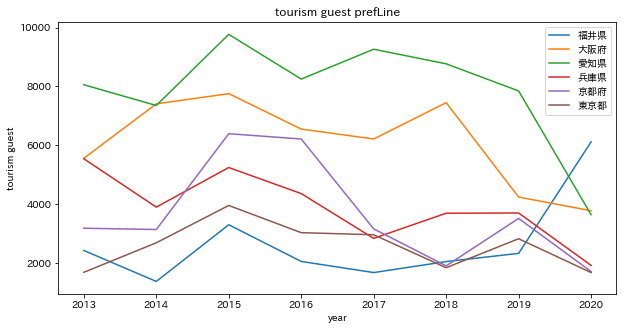

In [284]:
import japanize_matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

x = data['year']
y = data.iloc[:,1:]

plt.figure(figsize = (10,5))
plt.title('tourism guest prefLine')
plt.plot(x, y)
plt.legend(labels = data.columns[1:])
plt.xlabel('year')
plt.ylabel('tourism guest')
plt.show()

In [21]:
header = {'X-API-KEY': 'lZqzB2XTVJmbANCXxGvCVmeDQs1XeP89JFoLC8bU'} # API利用用に取得されたキーを入力ください
end_point = 'https://opendata.resas-portal.go.jp'
todofuken_ichiran = '/api/v1/prefectures' # 都道府県一覧のGET先
 
r = requests.get(end_point + todofuken_ichiran, headers=header)
pref = pd.DataFrame(r.json()['result'])

ido = '/api/v1/tourism/guest/prefLine' # 地域ブロック別純移動数のGET先

data_list = []

year_list = [i for i in range(2013,2021)]
df_year = pd.DataFrame({'year' : year_list})
data_list = [df_year]

year_index = {2013:0, 2014:1, 2015:2, 2016:3, 2017:4, 2018:5, 2019:6, 2020:7}


for i in range(len(pref)):
    pref_num = pref.loc[i, 'prefCode']
    pref_name = pref.loc[i, 'prefName']
    params = {'year' : 2020,'prefCode': 18, 'cityCode': 18501, 'addOppPrefCode' : pref_num}
    r = requests.get(end_point + ido, params = params, headers = header) # APIを叩く
    if r.json()['result'] is not None:
        pref_info = r.json()['result']['changes']
    
        for info in pref_info:
            pref_name_column = info['oppPrefName']

            value_list = [0] * 8
            
            for d in info['data']:
                if d['year'] in year_index:
                    value_list[year_index[d['year']]] = d['value']

            df = pd.DataFrame(value_list, columns = [pref_name_column])

            data_list.append(df)

    else:
        df = pd.DataFrame(np.zeros(len(year_list)), columns = [pref_name])
        
        data_list.append(df)

data = pd.concat(data_list, axis = 1)
data

year  北海道  青森県  岩手県  宮城県  秋田県  山形県  福島県  茨城県  栃木県  ...  愛媛県  高知県  福岡県  佐賀県  \
0  2013  0.0  0.0  0.0  0.0  0.0  0.0  0.0   59  258  ...    0  0.0  0.0  0.0   
1  2014  0.0  0.0  0.0  0.0  0.0  0.0  0.0    0  139  ...  118  0.0  0.0  0.0   
2  2015  0.0  0.0  0.0  0.0  0.0  0.0  0.0  312    0  ...   56  0.0  0.0  0.0   
3  2016  0.0  0.0  0.0  0.0  0.0  0.0  0.0  114    0  ...  229  0.0  0.0  0.0   
4  2017  0.0  0.0  0.0  0.0  0.0  0.0  0.0   70  211  ...   40  0.0  0.0  0.0   
5  2018  0.0  0.0  0.0  0.0  0.0  0.0  0.0  364  252  ...    0  0.0  0.0  0.0   
6  2019  0.0  0.0  0.0  0.0  0.0  0.0  0.0  376  265  ...   69  0.0  0.0  0.0   
7  2020  0.0  0.0  0.0  0.0  0.0  0.0  0.0   33   60  ...   79  0.0  0.0  0.0   

   長崎県  熊本県  大分県  宮崎県  鹿児島県  沖縄県  
0  0.0  0.0  0.0  0.0   0.0    0  
1  0.0  0.0  0.0  0.0   0.0    0  
2  0.0  0.0  0.0  0.0   0.0    0  
3  0.0  0.0  0.0  0.0   0.0    0  
4  0.0  0.0  0.0  0.0   0.0    0  
5  0.0  0.0  0.0  0.0   0.0  275  
6  0.0  0.0  0.0  0.0   0.0  124  
7  0.0  0.0  0.0  0.0   0.0   16  

[8 rows x 48 columns]

## 福井県若狭町

In [3]:
header = {'X-API-KEY': 'lZqzB2XTVJmbANCXxGvCVmeDQs1XeP89JFoLC8bU'} # API利用用に取得されたキーを入力ください
end_point = 'https://opendata.resas-portal.go.jp'
todofuken_ichiran = '/api/v1/prefectures' # 都道府県一覧のGET先
 
r = requests.get(end_point + todofuken_ichiran, headers=header)
pref = pd.DataFrame(r.json()['result'])

ido = '/api/v1/tourism/guest/prefLine' # 地域ブロック別純移動数のGET先


column_list = [i for i in range(2013,2021)]
column_list.insert(0, 'pref_name')
df = pd.DataFrame(columns = column_list)


year_index = {2013:1, 2014:2, 2015:3, 2016:4, 2017:5, 2018:6, 2019:7, 2020:8}


for i in range(len(pref)):
    pref_num = pref.loc[i, 'prefCode']
    pref_name = pref.loc[i, 'prefName']
    params = {'year' : 2020,'prefCode': 18, 'cityCode': 18501, 'addOppPrefCode' : pref_num}
    r = requests.get(end_point + ido, params = params, headers = header) # APIを叩く
    
    value_list = [0] * 8
    value_list.insert(0, pref_name)
    
    
    if r.json()['result'] is not None:
        pref_data = r.json()['result']['changes']
        for i in pref_data:
            for d in i['data']:
                if d['year'] in year_index:
                    value_list[year_index[d['year']]] = d['value']
                    
            row = pd.Series(value_list, index=df.columns)
            df = pd.concat([df,pd.DataFrame(data = row.values.reshape(1,-1), columns=df.columns)])

    else:
        row = pd.Series(value_list, index=df.columns)
        df = pd.concat([df,pd.DataFrame(data = row.values.reshape(1,-1), columns=df.columns)])

df = df.reset_index(drop=True)

In [4]:
df['mean'] = df.iloc[:,1:].mean(axis=1)

In [5]:
total = df.sum()
total['pref_name'] = "total"

df = pd.concat([df,pd.DataFrame(data = total.values.reshape(1,-1), columns=df.columns)])
df = df.reset_index(drop=True)

In [6]:
df_rank = df.sort_values('mean', ascending=False).reset_index(drop=True).head(n=11)
df_rank

pref_name   2013   2014   2015   2016   2017   2018   2019   2020  \
0      total  44463  39820  55456  45956  43379  39006  38722  24983   
1        愛知県   8060   7354   9772   8252   9266   8771   7849   3643   
2        大阪府   5560   7410   7757   6552   6216   7451   4241   3778   
3        兵庫県   5544   3900   5246   4360   2838   3693   3700   1920   
4        京都府   3183   3139   6395   6215   3161   1904   3516   1712   
5        福井県   2427   1374   3301   2054   1676   2049   2328   6118   
6        東京都   1684   2687   3957   3032   2961   1841   2826   1676   
7        岐阜県   3362   2022   2799   2888   3039   2292   1920    799   
8        滋賀県   4000   2161   2532   1544   1724   2698   1800    889   
9       神奈川県    935   1327   2071   2718   1343   1109   1614    878   
10       奈良県   1208   1758   1805   1322   1100   1134   1632    591   

         mean  
0   41473.125  
1    7870.875  
2    6120.625  
3    3900.125  
4    3653.125  
5    2665.875  
6      2583.0  
7    2390.125  
8      2168.5  
9    1499.375  
10    1318.75

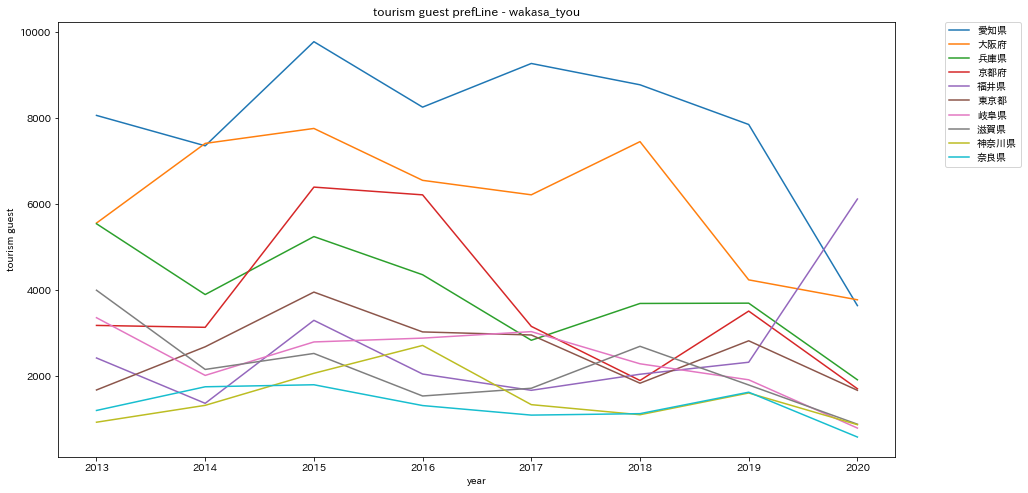

In [8]:
import japanize_matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

x = df_rank.iloc[1:,:-1].set_index('pref_name').transpose().index
y = df_rank.iloc[1:,:-1].set_index('pref_name').transpose()

plt.figure(figsize = (15,8))
plt.title('tourism guest prefLine - wakasa_tyou')
plt.plot(x, y)
plt.legend(labels = df_rank.iloc[1:,:-1].set_index('pref_name').transpose().columns,
           bbox_to_anchor=(1.15, 1),
           loc='upper right',
           borderaxespad=0)
plt.xlabel('year')
plt.ylabel('tourism guest')
plt.savefig("img1.svg")
plt.show()

In [20]:
import japanize_matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
# APIで取得不可なデータを手動で入手
df = pd.DataFrame({'city_name' : ['福井県若狭町', '広島県竹原市', '滋賀県大津市', '兵庫県丹波篠山市', '宮崎県日南市', '千葉県香取市', '愛媛県大洲市', '岐阜県御嵩町'],
                   'visit_men' : [9798, 13217, 651132, 1603, 42335, 2927, 5031,386], 
                   'visit_women' : [10933, 12225, 793941, 1898, 43661, 1070, 3068, 645],
                   'visit_child' : [2323, 2815, 125815, 356, 5409, 38, 35, 36],
                   'couple' : [8150, 7444, 538213, 1512, 34952, 1191, 3118, 659],
                   'family' : [6151, 7011, 346019, 911, 14832, 107, 105, 88],
                   'group_mix' : [5373, 4954, 324826, 447, 17191, 258, 1202, 64],
                   'group_men' : [898, 1833, 73515, 376, 4018, 563, 464, 0],
                   'group_women' : [1810, 2625, 193475, 539, 10524, 81, 429, 253],
                   'alone' : [684, 4410, 94822, 70, 9873, 1833, 2806, 0],
                   '1-stay' : [12051, 17451, 941468, 3613, 41757, 2321, 6309, 1034],
                   '2or3-stay' : [11002, 10146, 534940, 242, 34426, 1393, 1414, 30],
                   'over-4-stay' : [0, 668, 94464, 0, 15210, 332, 406, 0]
                  })
                               

df

city_name  visit_men  visit_women  visit_child  couple  family  group_mix  \
0    福井県若狭町       9798        10933         2323    8150    6151       5373   
1    広島県竹原市      13217        12225         2815    7444    7011       4954   
2    滋賀県大津市     651132       793941       125815  538213  346019     324826   
3  兵庫県丹波篠山市       1603         1898          356    1512     911        447   
4    宮崎県日南市      42335        43661         5409   34952   14832      17191   
5    千葉県香取市       2927         1070           38    1191     107        258   
6    愛媛県大洲市       5031         3068           35    3118     105       1202   
7    岐阜県御嵩町        386          645           36     659      88         64   

   group_men  group_women  alone  1-stay  2or3-stay  over-4-stay  
0        898         1810    684   12051      11002            0  
1       1833         2625   4410   17451      10146          668  
2      73515       193475  94822  941468     534940        94464  
3        376          539     70    3613        242            0  
4       4018        10524   9873   41757      34426        15210  
5        563           81   1833    2321       1393          332  
6        464          429   2806    6309       1414          406  
7          0          253      0    1034         30            0

In [30]:
visit_total = df.iloc[:, 1:4].sum(axis=1)


for i in range(8):
    visit_update = df.iloc[i, 1:4] / visit_total[i]
    df.iloc[i, 1:4] = visit_update.values
    
df

city_name  visit_men  visit_women  visit_child  couple  family  group_mix  \
0    福井県若狭町   0.425002     0.474234     0.100763    8150    6151       5373   
1    広島県竹原市   0.467743     0.432636     0.099621    7444    7011       4954   
2    滋賀県大津市   0.414499     0.505409     0.080092  538213  346019     324826   
3  兵庫県丹波篠山市   0.415608     0.492092     0.092300    1512     911        447   
4    宮崎県日南市   0.463158     0.477665     0.059176   34952   14832      17191   
5    千葉県香取市   0.725403     0.265180     0.009418    1191     107        258   
6    愛媛県大洲市   0.618515     0.377182     0.004303    3118     105       1202   
7    岐阜県御嵩町   0.361762     0.604499     0.033739     659      88         64   

   group_men  group_women  alone  1-stay  2or3-stay  over-4-stay  
0        898         1810    684   12051      11002            0  
1       1833         2625   4410   17451      10146          668  
2      73515       193475  94822  941468     534940        94464  
3        376          539     70    3613        242            0  
4       4018        10524   9873   41757      34426        15210  
5        563           81   1833    2321       1393          332  
6        464          429   2806    6309       1414          406  
7          0          253      0    1034         30            0

In [31]:
type_total = df.iloc[:, 4:10].sum(axis=1)


for i in range(8):
    type_update = df.iloc[i, 4:10] / type_total[i]
    df.iloc[i, 4:10] = type_update.values
    
df

city_name  visit_men  visit_women  visit_child    couple    family  \
0    福井県若狭町   0.425002     0.474234     0.100763  0.353334  0.266670   
1    広島県竹原市   0.467743     0.432636     0.099621  0.263253  0.247940   
2    滋賀県大津市   0.414499     0.505409     0.080092  0.342621  0.220272   
3  兵庫県丹波篠山市   0.415608     0.492092     0.092300  0.392218  0.236316   
4    宮崎県日南市   0.463158     0.477665     0.059176  0.382449  0.162293   
5    千葉県香取市   0.725403     0.265180     0.009418  0.295314  0.026531   
6    愛媛県大洲市   0.618515     0.377182     0.004303  0.383801  0.012925   
7    岐阜県御嵩町   0.361762     0.604499     0.033739  0.619361  0.082707   

   group_mix  group_men  group_women     alone  1-stay  2or3-stay  over-4-stay  
0   0.232940   0.038932     0.078470  0.029654   12051      11002            0  
1   0.175195   0.064823     0.092832  0.155957   17451      10146          668  
2   0.206781   0.046799     0.123164  0.060363  941468     534940        94464  
3   0.115953   0.097536     0.139818  0.018158    3613        242            0  
4   0.188106   0.043965     0.115155  0.108032   41757      34426        15210  
5   0.063972   0.139598     0.020084  0.454500    2321       1393          332  
6   0.147957   0.057115     0.052806  0.345396    6309       1414          406  
7   0.060150   0.000000     0.237782  0.000000    1034         30            0

In [32]:
stay_total = df.iloc[:, 10:].sum(axis=1)


for i in range(8):
    stay_update = df.iloc[i, 10:] / stay_total[i]
    df.iloc[i, 10:] = stay_update.values
    
df

city_name  visit_men  visit_women  visit_child    couple    family  \
0    福井県若狭町   0.425002     0.474234     0.100763  0.353334  0.266670   
1    広島県竹原市   0.467743     0.432636     0.099621  0.263253  0.247940   
2    滋賀県大津市   0.414499     0.505409     0.080092  0.342621  0.220272   
3  兵庫県丹波篠山市   0.415608     0.492092     0.092300  0.392218  0.236316   
4    宮崎県日南市   0.463158     0.477665     0.059176  0.382449  0.162293   
5    千葉県香取市   0.725403     0.265180     0.009418  0.295314  0.026531   
6    愛媛県大洲市   0.618515     0.377182     0.004303  0.383801  0.012925   
7    岐阜県御嵩町   0.361762     0.604499     0.033739  0.619361  0.082707   

   group_mix  group_men  group_women     alone    1-stay  2or3-stay  \
0   0.232940   0.038932     0.078470  0.029654  0.522752   0.477248   
1   0.175195   0.064823     0.092832  0.155957  0.617407   0.358960   
2   0.206781   0.046799     0.123164  0.060363  0.599328   0.340537   
3   0.115953   0.097536     0.139818  0.018158  0.937224   0.062776   
4   0.188106   0.043965     0.115155  0.108032  0.456895   0.376681   
5   0.063972   0.139598     0.020084  0.454500  0.573653   0.344291   
6   0.147957   0.057115     0.052806  0.345396  0.776110   0.173945   
7   0.060150   0.000000     0.237782  0.000000  0.971805   0.028195   

   over-4-stay  
0     0.000000  
1     0.023633  
2     0.060135  
3     0.000000  
4     0.166424  
5     0.082056  
6     0.049945  
7     0.000000

In [25]:
import seaborn as sns

In [33]:
X = df.drop(['city_name'], axis = 1).values
X

array([[0.42500217, 0.47423441, 0.10076343, 0.35333391, 0.26666956,
        0.23294026, 0.03893176, 0.07847048, 0.02965404, 0.52275192,
        0.47724808, 0.        ],
       [0.46774251, 0.43263616, 0.09962133, 0.26325282, 0.24794002,
        0.17519539, 0.064823  , 0.09283163, 0.15595714, 0.61740669,
        0.35895984, 0.02363347],
       [0.41449932, 0.50540904, 0.08009164, 0.34262097, 0.22027221,
        0.20678096, 0.04679891, 0.12316423, 0.06036273, 0.59932827,
        0.34053698, 0.06013475],
       [0.41560799, 0.4920923 , 0.09229971, 0.3922179 , 0.23631647,
        0.11595331, 0.09753567, 0.13981842, 0.01815824, 0.93722438,
        0.06277562, 0.        ],
       [0.46315847, 0.47766534, 0.05917619, 0.38244885, 0.16229347,
        0.18810592, 0.04396542, 0.11515483, 0.10803151, 0.45689495,
        0.37668093, 0.16642412],
       [0.72540273, 0.26517968, 0.0094176 , 0.29531366, 0.02653112,
        0.06397223, 0.13959831, 0.0200843 , 0.45450037, 0.57365299,
        0.34429066,

In [34]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
cluster = kmeans.predict(X)
cluster

array([0, 0, 0, 1, 0, 2, 2, 1], dtype=int32)

In [35]:
df = df.assign(cluster = cluster)
df['cluster'] = df['cluster'].astype('str')
df

city_name  visit_men  visit_women  visit_child    couple    family  \
0    福井県若狭町   0.425002     0.474234     0.100763  0.353334  0.266670   
1    広島県竹原市   0.467743     0.432636     0.099621  0.263253  0.247940   
2    滋賀県大津市   0.414499     0.505409     0.080092  0.342621  0.220272   
3  兵庫県丹波篠山市   0.415608     0.492092     0.092300  0.392218  0.236316   
4    宮崎県日南市   0.463158     0.477665     0.059176  0.382449  0.162293   
5    千葉県香取市   0.725403     0.265180     0.009418  0.295314  0.026531   
6    愛媛県大洲市   0.618515     0.377182     0.004303  0.383801  0.012925   
7    岐阜県御嵩町   0.361762     0.604499     0.033739  0.619361  0.082707   

   group_mix  group_men  group_women     alone    1-stay  2or3-stay  \
0   0.232940   0.038932     0.078470  0.029654  0.522752   0.477248   
1   0.175195   0.064823     0.092832  0.155957  0.617407   0.358960   
2   0.206781   0.046799     0.123164  0.060363  0.599328   0.340537   
3   0.115953   0.097536     0.139818  0.018158  0.937224   0.062776   
4   0.188106   0.043965     0.115155  0.108032  0.456895   0.376681   
5   0.063972   0.139598     0.020084  0.454500  0.573653   0.344291   
6   0.147957   0.057115     0.052806  0.345396  0.776110   0.173945   
7   0.060150   0.000000     0.237782  0.000000  0.971805   0.028195   

   over-4-stay cluster  
0     0.000000       0  
1     0.023633       0  
2     0.060135       0  
3     0.000000       1  
4     0.166424       0  
5     0.082056       2  
6     0.049945       2  
7     0.000000       1

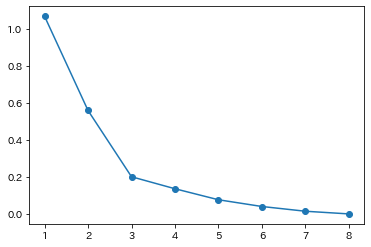

In [36]:
inertia = []

for i in range(1,9):
    km = KMeans(n_clusters = i, max_iter = 300)
    km.fit(X)
    inertia.append(km.inertia_)
    
plt.plot(range(1,9), inertia, marker='o')
plt.show()

In [43]:
df[['city_name','cluster']]

city_name cluster
0    福井県若狭町       0
1    広島県竹原市       0
2    滋賀県大津市       0
3  兵庫県丹波篠山市       1
4    宮崎県日南市       0
5    千葉県香取市       2
6    愛媛県大洲市       2
7    岐阜県御嵩町       1

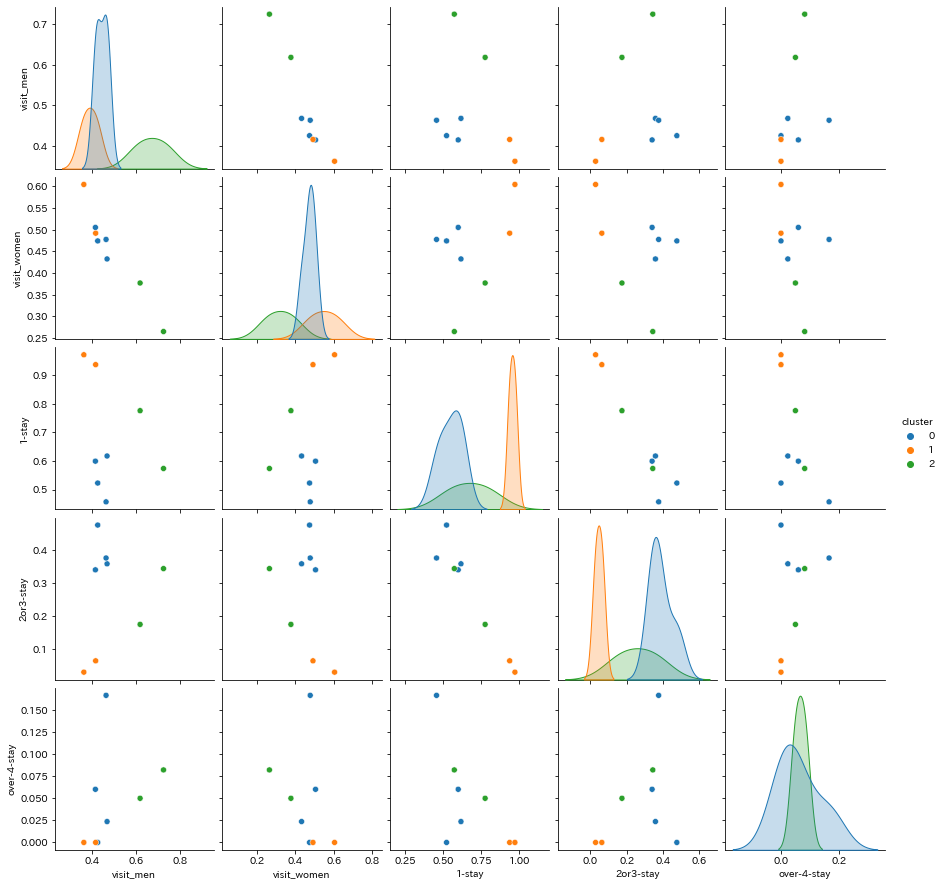

In [40]:
sns.pairplot(df.iloc[:, [1,2,10,11,12,13]], hue = 'cluster')
plt.savefig('img_pairplot.svg')
plt.show()

cluster 0　は1泊の観光客が多い傾向
cluster 2は男性の観光客が多い傾向

##　広島県竹原市

In [314]:
header = {'X-API-KEY': 'lZqzB2XTVJmbANCXxGvCVmeDQs1XeP89JFoLC8bU'}
url = 'https://opendata.resas-portal.go.jp/api/v1/cities'

params = {'prefCode': 34}

r = requests.get(url, params = params, headers = header)
print('status_code:', r.status_code)
pprint.pprint(r.json())

status_code: 200
{'message': None,
 'result': [{'bigCityFlag': '2',
             'cityCode': '34100',
             'cityName': '広島市',
             'prefCode': 34},
            {'bigCityFlag': '1',
             'cityCode': '34101',
             'cityName': '広島市中区',
             'prefCode': 34},
            {'bigCityFlag': '1',
             'cityCode': '34102',
             'cityName': '広島市東区',
             'prefCode': 34},
            {'bigCityFlag': '1',
             'cityCode': '34103',
             'cityName': '広島市南区',
             'prefCode': 34},
            {'bigCityFlag': '1',
             'cityCode': '34104',
             'cityName': '広島市西区',
             'prefCode': 34},
            {'bigCityFlag': '1',
             'cityCode': '34105',
             'cityName': '広島市安佐南区',
             'prefCode': 34},
            {'bigCityFlag': '1',
             'cityCode': '34106',
             'cityName': '広島市安佐北区',
             'prefCode': 34},
            {'bigCityFlag': '1',
             

In [317]:
df = pd.json_normalize(r.json()['result'])
df.query("cityName == '竹原市'")[['prefCode', 'cityCode']].to_dict(orient='records')[0]

{'prefCode': 34, 'cityCode': '34203'}

In [318]:
header = {'X-API-KEY': 'lZqzB2XTVJmbANCXxGvCVmeDQs1XeP89JFoLC8bU'} # API利用用に取得されたキーを入力ください
end_point = 'https://opendata.resas-portal.go.jp'
todofuken_ichiran = '/api/v1/prefectures' # 都道府県一覧のGET先
 
r = requests.get(end_point + todofuken_ichiran, headers=header)
pref = pd.DataFrame(r.json()['result'])

ido = '/api/v1/tourism/guest/prefLine' # 地域ブロック別純移動数のGET先


column_list = [i for i in range(2013,2021)]
column_list.insert(0, 'pref_name')
df = pd.DataFrame(columns = column_list)


year_index = {2013:1, 2014:2, 2015:3, 2016:4, 2017:5, 2018:6, 2019:7, 2020:8}


for i in range(len(pref)):
    pref_num = pref.loc[i, 'prefCode']
    pref_name = pref.loc[i, 'prefName']
    params = {'year' : 2020,'prefCode': 34, 'cityCode': 34203, 'addOppPrefCode' : pref_num}
    r = requests.get(end_point + ido, params = params, headers = header) # APIを叩く
    
    value_list = [0] * 8
    value_list.insert(0, pref_name)
    
    
    if r.json()['result'] is not None:
        pref_data = r.json()['result']['changes']
        for i in pref_data:
            for d in i['data']:
                if d['year'] in year_index:
                    value_list[year_index[d['year']]] = d['value']
                    
            row = pd.Series(value_list, index=df.columns)
            df = pd.concat([df,pd.DataFrame(data = row.values.reshape(1,-1), columns=df.columns)])

    else:
        row = pd.Series(value_list, index=df.columns)
        df = pd.concat([df,pd.DataFrame(data = row.values.reshape(1,-1), columns=df.columns)])

df = df.reset_index(drop=True)

In [319]:
df['mean'] = df.iloc[:,1:].mean(axis=1)

In [320]:
total = df.sum()
total['pref_name'] = "total"

df = pd.concat([df,pd.DataFrame(data = total.values.reshape(1,-1), columns=df.columns)])
df = df.reset_index(drop=True)

In [321]:
df_rank = df.sort_values('mean', ascending=False).reset_index(drop=True).head(n=11)
df_rank

pref_name   2013   2014   2015   2016   2017   2018   2019   2020      mean
0      total  12776  16883  29592  38009  38391  39354  45618  28861   31185.5
1        広島県   3896   5520   6620   7362   7196   6242   9044   9922   6975.25
2        大阪府   1830   1006   3814   3591   4575   5807   7556   4792  4121.375
3        東京都   1603   1971   3865   5025   4411   4809   6497   2426  3825.875
4        兵庫県   1299   1337   2672   3140   3502   3470   3562   1588   2571.25
5       神奈川県    672    865   2187   2219   3228   3406   3499   1228    2163.0
6        千葉県    714    267    991   2129   2080   2073   1433    694  1297.625
7        埼玉県     95   1062    871   1418   1639   1872   1642    973    1196.5
8        福岡県    697    715    992   2191   1690   1858    788    638  1196.125
9        京都府    225   1078   1087    857   1707   1381   2496    710  1192.625
10       愛知県    194    766    644   1698    772   1393   1310    752   941.125

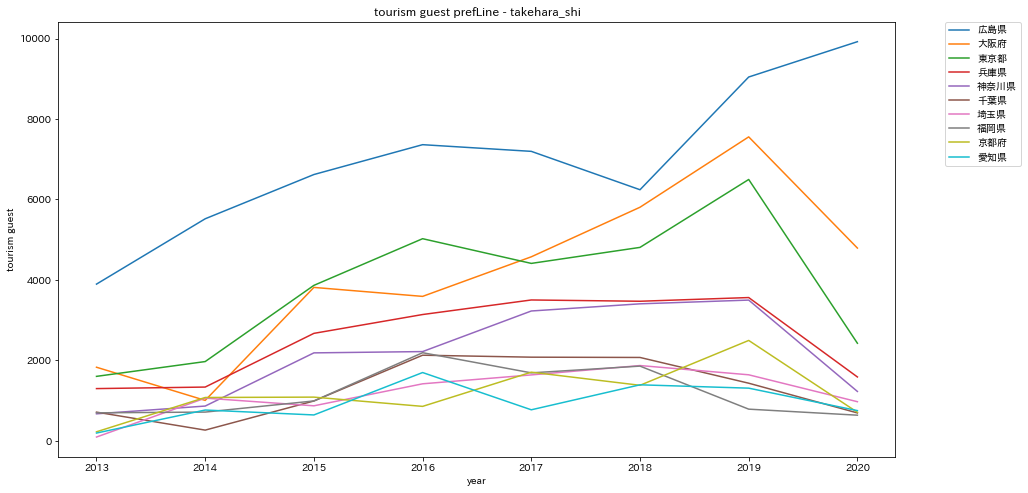

In [322]:
x = df_rank.iloc[1:,:-1].set_index('pref_name').transpose().index
y = df_rank.iloc[1:,:-1].set_index('pref_name').transpose()

plt.figure(figsize = (15,8))
plt.title('tourism guest prefLine - takehara_shi')
plt.plot(x, y)
plt.legend(labels = df_rank.iloc[1:,:-1].set_index('pref_name').transpose().columns,
           bbox_to_anchor=(1.15, 1),
           loc='upper right',
           borderaxespad=0)
plt.xlabel('year')
plt.ylabel('tourism guest')
plt.show()

## 滋賀県大津市

In [323]:
header = {'X-API-KEY': 'lZqzB2XTVJmbANCXxGvCVmeDQs1XeP89JFoLC8bU'} # API利用用に取得されたキーを入力ください
end_point = 'https://opendata.resas-portal.go.jp'
todofuken_ichiran = '/api/v1/prefectures' # 都道府県一覧のGET先
 
r_todofuken = requests.get(end_point+todofuken_ichiran, headers=header)
pprint.pprint(r.json())

{'message': None,
 'result': [{'prefCode': 1, 'prefName': '北海道'},
            {'prefCode': 2, 'prefName': '青森県'},
            {'prefCode': 3, 'prefName': '岩手県'},
            {'prefCode': 4, 'prefName': '宮城県'},
            {'prefCode': 5, 'prefName': '秋田県'},
            {'prefCode': 6, 'prefName': '山形県'},
            {'prefCode': 7, 'prefName': '福島県'},
            {'prefCode': 8, 'prefName': '茨城県'},
            {'prefCode': 9, 'prefName': '栃木県'},
            {'prefCode': 10, 'prefName': '群馬県'},
            {'prefCode': 11, 'prefName': '埼玉県'},
            {'prefCode': 12, 'prefName': '千葉県'},
            {'prefCode': 13, 'prefName': '東京都'},
            {'prefCode': 14, 'prefName': '神奈川県'},
            {'prefCode': 15, 'prefName': '新潟県'},
            {'prefCode': 16, 'prefName': '富山県'},
            {'prefCode': 17, 'prefName': '石川県'},
            {'prefCode': 18, 'prefName': '福井県'},
            {'prefCode': 19, 'prefName': '山梨県'},
            {'prefCode': 20, 'prefName': '長野県'},
          

In [338]:
for i in r.json()['result']:
    if i['prefName'] == '滋賀県':
        params = i

In [403]:
for i in params.values():
    if type(i) is int:
        params = {'prefCode' : i}

In [404]:
params

{'prefCode': 25}

In [405]:
header = {'X-API-KEY': 'lZqzB2XTVJmbANCXxGvCVmeDQs1XeP89JFoLC8bU'}
url = 'https://opendata.resas-portal.go.jp/api/v1/cities'

r = requests.get(url, params = params, headers = header)
print('status_code:', r.status_code)
pprint.pprint(r.json())

status_code: 200
{'message': None,
 'result': [{'bigCityFlag': '0',
             'cityCode': '25201',
             'cityName': '大津市',
             'prefCode': 25},
            {'bigCityFlag': '0',
             'cityCode': '25202',
             'cityName': '彦根市',
             'prefCode': 25},
            {'bigCityFlag': '0',
             'cityCode': '25203',
             'cityName': '長浜市',
             'prefCode': 25},
            {'bigCityFlag': '0',
             'cityCode': '25204',
             'cityName': '近江八幡市',
             'prefCode': 25},
            {'bigCityFlag': '0',
             'cityCode': '25206',
             'cityName': '草津市',
             'prefCode': 25},
            {'bigCityFlag': '0',
             'cityCode': '25207',
             'cityName': '守山市',
             'prefCode': 25},
            {'bigCityFlag': '0',
             'cityCode': '25208',
             'cityName': '栗東市',
             'prefCode': 25},
            {'bigCityFlag': '0',
             'cityCode': '2

In [408]:
for i in r.json()['result']:
    if i['cityName'] == '大津市':
        params = i

prefCode = params['prefCode']
cityCode = params['cityCode']

25 25201


In [409]:
header = {'X-API-KEY': 'lZqzB2XTVJmbANCXxGvCVmeDQs1XeP89JFoLC8bU'} # API利用用に取得されたキーを入力ください
end_point = 'https://opendata.resas-portal.go.jp'
todofuken_ichiran = '/api/v1/prefectures' # 都道府県一覧のGET先
 
r = requests.get(end_point + todofuken_ichiran, headers=header)
pref = pd.DataFrame(r.json()['result'])

ido = '/api/v1/tourism/guest/prefLine' # 地域ブロック別純移動数のGET先


column_list = [i for i in range(2013,2021)]
column_list.insert(0, 'pref_name')
df = pd.DataFrame(columns = column_list)


year_index = {2013:1, 2014:2, 2015:3, 2016:4, 2017:5, 2018:6, 2019:7, 2020:8}


for i in range(len(pref)):
    pref_num = pref.loc[i, 'prefCode']
    pref_name = pref.loc[i, 'prefName']
    params = {'year' : 2020,'prefCode': prefCode, 'cityCode': cityCode, 'addOppPrefCode' : pref_num}
    r = requests.get(end_point + ido, params = params, headers = header) # APIを叩く
    
    value_list = [0] * 8
    value_list.insert(0, pref_name)
    
    
    if r.json()['result'] is not None:
        pref_data = r.json()['result']['changes']
        for i in pref_data:
            for d in i['data']:
                if d['year'] in year_index:
                    value_list[year_index[d['year']]] = d['value']
                    
            row = pd.Series(value_list, index=df.columns)
            df = pd.concat([df,pd.DataFrame(data = row.values.reshape(1,-1), columns=df.columns)])

    else:
        row = pd.Series(value_list, index=df.columns)
        df = pd.concat([df,pd.DataFrame(data = row.values.reshape(1,-1), columns=df.columns)])

df = df.reset_index(drop=True)

In [410]:
df['mean'] = df.iloc[:,1:].mean(axis=1)

In [411]:
total = df.sum()
total['pref_name'] = "total"

df = pd.concat([df,pd.DataFrame(data = total.values.reshape(1,-1), columns=df.columns)])
df = df.reset_index(drop=True)

In [412]:
df_rank = df.sort_values('mean', ascending=False).reset_index(drop=True).head(n=11)
df_rank

pref_name     2013     2014     2015     2016     2017     2018     2019  \
0      total  2144909  2630467  3090271  2598236  2403780  2420249  2701779   
1        大阪府   398627   487264   535682   422137   392546   410897   466504   
2        東京都   233937   335336   394610   330314   297076   315110   373316   
3        京都府   209647   298812   312070   239017   209342   188251   191362   
4        兵庫県   181534   197599   239239   199160   198215   201806   227562   
5        愛知県   141692   169352   212785   183473   172674   203866   203376   
6       神奈川県   149788   184352   215731   197200   191580   156038   179313   
7        滋賀県   114058   107363   137241   104524    97050    99284   102786   
8        埼玉県    83621   101781   142110   133809   117136   113406   138086   
9        千葉県    70104    94237   126610   111226    93864    83536    96090   
10       奈良県    54854    75977    70254    59527    57134    66096    70521   

       2020        mean  
0   1631713   2452675.5  
1    356327    433748.0  
2    114520  299277.375  
3    187008  229438.625  
4    140144  198157.375  
5    137249  178058.375  
6     76316   168789.75  
7    254474    127097.5  
8     49649   109949.75  
9     36316   88997.875  
10    41550   61989.125

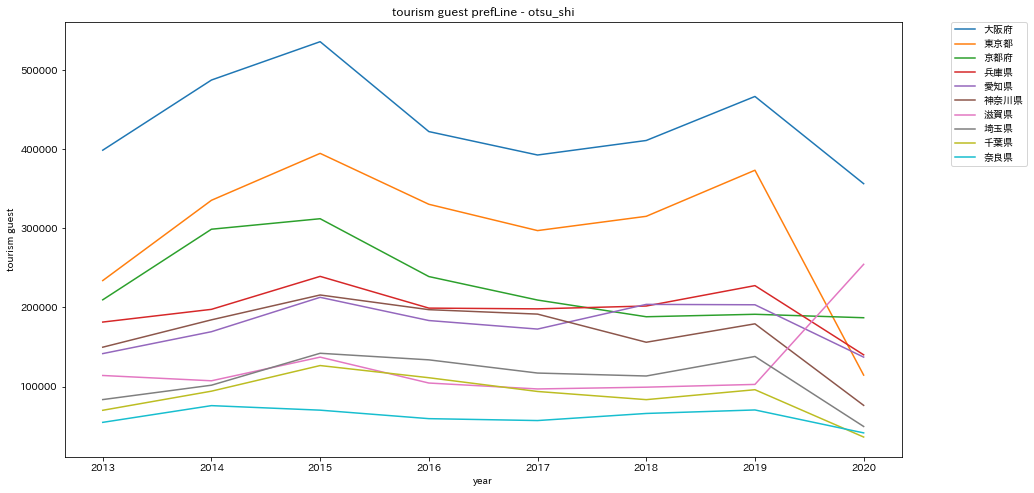

In [414]:
x = df_rank.iloc[1:,:-1].set_index('pref_name').transpose().index
y = df_rank.iloc[1:,:-1].set_index('pref_name').transpose()

plt.figure(figsize = (15,8))
plt.title('tourism guest prefLine - otsu_shi')
plt.plot(x, y)
plt.legend(labels = df_rank.iloc[1:,:-1].set_index('pref_name').transpose().columns,
           bbox_to_anchor=(1.15, 1),
           loc='upper right',
           borderaxespad=0)
plt.xlabel('year')
plt.ylabel('tourism guest')
plt.show()

## 兵庫県丹波篠山市

In [415]:
header = {'X-API-KEY': 'lZqzB2XTVJmbANCXxGvCVmeDQs1XeP89JFoLC8bU'} # API利用用に取得されたキーを入力ください
end_point = 'https://opendata.resas-portal.go.jp'
todofuken_ichiran = '/api/v1/prefectures' # 都道府県一覧のGET先
 
r_todofuken = requests.get(end_point+todofuken_ichiran, headers=header)

for i in r_todofuken.json()['result']:
    if i['prefName'] == '兵庫県':
        params = i

In [416]:
for i in params.values():
    if type(i) is int:
        params = {'prefCode' : i}

In [422]:
city_ichiran = '/api/v1/cities' # 市区町村一覧のGET先

r_cities = requests.get(end_point+city_ichiran, params = params, headers = header)
print('status_code:', r_cities.status_code)

for i in r_cities.json()['result']:
    if i['cityName'] == '丹波篠山市':
        params = i

prefCode = params['prefCode']
cityCode = params['cityCode']

status_code: 200


In [423]:
ido = '/api/v1/tourism/guest/prefLine' # 地域ブロック別純移動数のGET先

column_list = [i for i in range(2013,2021)]
column_list.insert(0, 'pref_name')
df = pd.DataFrame(columns = column_list)


year_index = {2013:1, 2014:2, 2015:3, 2016:4, 2017:5, 2018:6, 2019:7, 2020:8}


for i in range(len(pref)):
    pref_num = pref.loc[i, 'prefCode']
    pref_name = pref.loc[i, 'prefName']
    params = {'year' : 2020,'prefCode': prefCode, 'cityCode': cityCode, 'addOppPrefCode' : pref_num}
    r = requests.get(end_point + ido, params = params, headers = header) # APIを叩く
    
    value_list = [0] * 8
    value_list.insert(0, pref_name)
    
    
    if r.json()['result'] is not None:
        pref_data = r.json()['result']['changes']
        for i in pref_data:
            for d in i['data']:
                if d['year'] in year_index:
                    value_list[year_index[d['year']]] = d['value']
                    
            row = pd.Series(value_list, index=df.columns)
            df = pd.concat([df,pd.DataFrame(data = row.values.reshape(1,-1), columns=df.columns)])

    else:
        row = pd.Series(value_list, index=df.columns)
        df = pd.concat([df,pd.DataFrame(data = row.values.reshape(1,-1), columns=df.columns)])

df = df.reset_index(drop=True)

In [424]:
df['mean'] = df.iloc[:,1:].mean(axis=1)

In [425]:
total = df.sum()
total['pref_name'] = "total"

df = pd.concat([df,pd.DataFrame(data = total.values.reshape(1,-1), columns=df.columns)])
df = df.reset_index(drop=True)

In [426]:
df_rank = df.sort_values('mean', ascending=False).reset_index(drop=True).head(n=11)
df_rank

pref_name  2013  2014  2015  2016  2017  2018  2019  2020      mean
0      total  3118  2278  2026  1774  3262  4862  5139  3606  3258.125
1        兵庫県  1155   900   709   721   869  2004  1561  2118  1254.625
2        大阪府  1288   525   854   166  1280  1633  1832   910    1061.0
3        東京都    38   253   113   416   342   275   254    88   222.375
4        愛知県    46   185     0    45   126   270   648    89   176.125
5        京都府    49   264   100   257    43   176   177   152    152.25
6        滋賀県   252    17     0     0   268   125    95   100   107.125
7        奈良県     0     0    43    22    53   379   229     9    91.875
8       神奈川県     0    66   124    23   223     0   166    36     79.75
9        埼玉県   290    52    41     0    36     0    61    18     62.25
10       徳島県     0     0     0   124     0     0     0    10     16.75

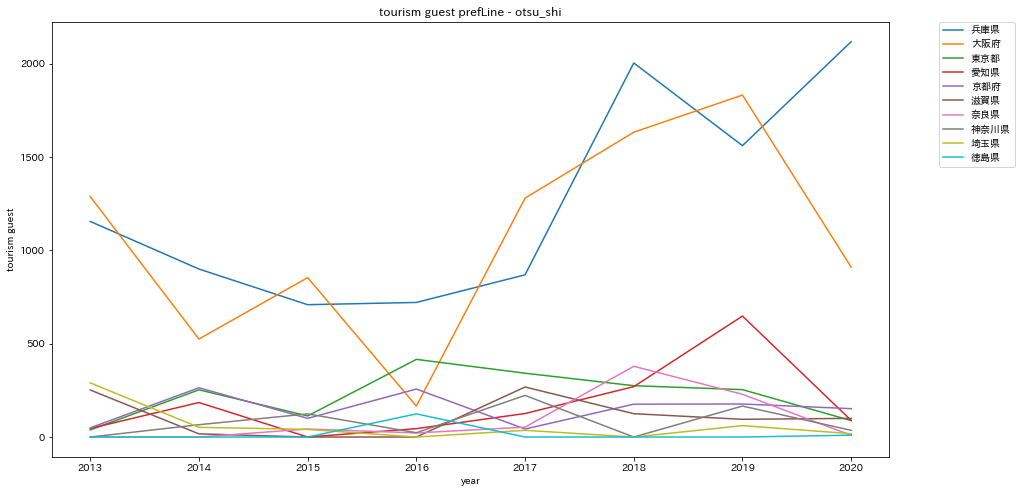

In [427]:
x = df_rank.iloc[1:,:-1].set_index('pref_name').transpose().index
y = df_rank.iloc[1:,:-1].set_index('pref_name').transpose()

plt.figure(figsize = (15,8))
plt.title('tourism guest prefLine - otsu_shi')
plt.plot(x, y)
plt.legend(labels = df_rank.iloc[1:,:-1].set_index('pref_name').transpose().columns,
           bbox_to_anchor=(1.15, 1),
           loc='upper right',
           borderaxespad=0)
plt.xlabel('year')
plt.ylabel('tourism guest')
plt.show()

In [86]:
data_demo = pd.read_csv("./population-society_20220906/00_Fromto定住人口/市区町村/18福井県/人口マップ_人口の社会増減_From-to定住人口_市区町村_18福井県_18501若狭町.csv", encoding='shift-jis')
data_demo.head()

集計年  自地域_都道府県コード 自地域_都道府県名  自地域_市区町村コード 自地域_市区町村名  相手先_都道府県コード 相手先_都道府県名  \
0  2012           18       福井県        18501       若狭町           13       東京都   
1  2012           18       福井県        18501       若狭町           13       東京都   
2  2012           18       福井県        18501       若狭町           13       東京都   
3  2012           18       福井県        18501       若狭町           13       東京都   
4  2012           18       福井県        18501       若狭町           13       東京都   

  相手先_市区町村コード 相手先_市区町村名   年代区分 男女区分 転出数（人） 転入数（人） 転入超過数（人）  地域識別コード  
0       13199   東京都その他区     総数   総数     12     10        -        1  
1       13199   東京都その他区  10代未満   総数      -      1        -        1  
2       13199   東京都その他区    10代   総数      2      -        -        1  
3       13199   東京都その他区    20代   総数      8      7        -        1  
4       13199   東京都その他区    30代   総数      1      -        -        1

## 千葉県香取市

In [10]:
header = {'X-API-KEY': 'lZqzB2XTVJmbANCXxGvCVmeDQs1XeP89JFoLC8bU'} # API利用用に取得されたキーを入力ください
end_point = 'https://opendata.resas-portal.go.jp'
todofuken_ichiran = '/api/v1/prefectures' # 都道府県一覧のGET先
 
r_todofuken = requests.get(end_point+todofuken_ichiran, headers=header)

for i in r_todofuken.json()['result']:
    if i['prefName'] == '千葉県':
        params = i

In [12]:
for i in params.values():
    if type(i) is int:
        params = {'prefCode' : i}

In [13]:
city_ichiran = '/api/v1/cities' # 市区町村一覧のGET先

r_cities = requests.get(end_point+city_ichiran, params = params, headers = header)
print('status_code:', r_cities.status_code)

for i in r_cities.json()['result']:
    if i['cityName'] == '香取市':
        params = i

prefCode = params['prefCode']
cityCode = params['cityCode']

status_code: 200


In [14]:
ido = '/api/v1/tourism/guest/prefLine' # 地域ブロック別純移動数のGET先

column_list = [i for i in range(2013,2021)]
column_list.insert(0, 'pref_name')
df = pd.DataFrame(columns = column_list)


year_index = {2013:1, 2014:2, 2015:3, 2016:4, 2017:5, 2018:6, 2019:7, 2020:8}


for i in range(len(pref)):
    pref_num = pref.loc[i, 'prefCode']
    pref_name = pref.loc[i, 'prefName']
    params = {'year' : 2020,'prefCode': prefCode, 'cityCode': cityCode, 'addOppPrefCode' : pref_num}
    r = requests.get(end_point + ido, params = params, headers = header) # APIを叩く
    
    value_list = [0] * 8
    value_list.insert(0, pref_name)
    
    
    if r.json()['result'] is not None:
        pref_data = r.json()['result']['changes']
        for i in pref_data:
            for d in i['data']:
                if d['year'] in year_index:
                    value_list[year_index[d['year']]] = d['value']
                    
            row = pd.Series(value_list, index=df.columns)
            df = pd.concat([df,pd.DataFrame(data = row.values.reshape(1,-1), columns=df.columns)])

    else:
        row = pd.Series(value_list, index=df.columns)
        df = pd.concat([df,pd.DataFrame(data = row.values.reshape(1,-1), columns=df.columns)])

df = df.reset_index(drop=True)

In [15]:
df['mean'] = df.iloc[:,1:].mean(axis=1)

In [16]:
total = df.sum()
total['pref_name'] = "total"

df = pd.concat([df,pd.DataFrame(data = total.values.reshape(1,-1), columns=df.columns)])
df = df.reset_index(drop=True)

In [17]:
df_rank = df.sort_values('mean', ascending=False).reset_index(drop=True).head(n=11)
df_rank

pref_name   2013  2014  2015  2016  2017  2018  2019  2020     mean
0      total  13291  4712  6635  4833  3473  3608  5750  3576  5734.75
1        東京都   2570  1441  1602  1280  1307   791  1715   784  1436.25
2        千葉県   2987  1096  1133   764   368   594   876  1210   1128.5
3       神奈川県   2105   463   957   831   379   504   981   383  825.375
4        埼玉県   2106   559   588   595   404   721   931   668    821.5
5        群馬県    753    93   554   299   154   228   198   164  305.375
6        茨城県    389   339   223   224   268   204   220    90  244.625
7        大阪府    651   107   472    65    33    72    62    45  188.375
8        静岡県    226   201   265   252   112    38   189    26  163.625
9        新潟県    356    86   178    63   190    77   142    33  140.625
10       愛知県    440   114   244    87    76    57    90     6   139.25

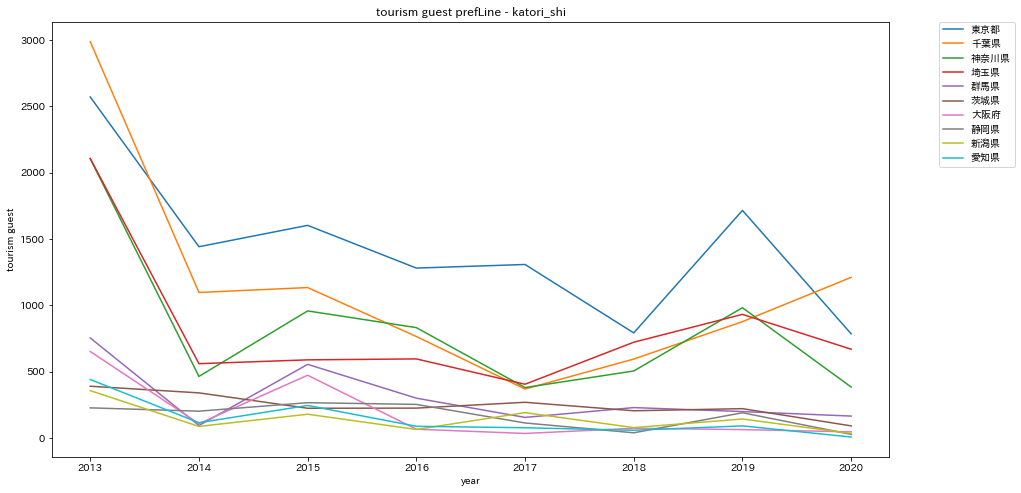

In [19]:
x = df_rank.iloc[1:,:-1].set_index('pref_name').transpose().index
y = df_rank.iloc[1:,:-1].set_index('pref_name').transpose()

plt.figure(figsize = (15,8))
plt.title('tourism guest prefLine - katori_shi')
plt.plot(x, y)
plt.legend(labels = df_rank.iloc[1:,:-1].set_index('pref_name').transpose().columns,
           bbox_to_anchor=(1.15, 1),
           loc='upper right',
           borderaxespad=0)
plt.xlabel('year')
plt.ylabel('tourism guest')
plt.show()

## Twitterからのデータ取得

In [87]:
import tweepy
from datetime import datetime, timezone
import pytz
import pandas as pd
import collections
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [88]:
#APIを叩くための設定
API_KEY = 'aUkkqj3YhIogdIPVdQk361qA6'
API_SECRET = 'kwuZ5ix9ZReswy0QOMfnS68O1NmXkvq0xc9Xes5VaJjb4gy6vE'
ACCESS_TOKEN = '1294502187012259845-RFq7K7LU1NLX0gKuVEd7M1pJMUgsTH'
ACCESS_SECRET = 'iQkxDlxT8CP1nq1BNlSx4qz6dXynBo7Joh1rOajpc8ujf'

# TwitterAPI認証
auth = tweepy.OAuthHandler(API_KEY, API_SECRET)
# アクセストークン設定
auth.set_access_token(ACCESS_TOKEN, ACCESS_SECRET)
#　”wait_on_rate_limit = True”　利用制限にひっかかた時に必要時間待機する
api = tweepy.API(auth,wait_on_rate_limit = True)

In [89]:
#tweepyで検索を行う
search_results = api.search_tweets(q="若狭町", 
                                   result_type="recent", 
                                   tweet_mode="extended", 
                                   count=5)

"""
result_typeは3種類

“recent”：時系列で最新ツイートを検索
“popular”：人気のあるツイートを検索
“mixed”：上記を混ぜたもの


tweet_mode=’extended’は、
ツイート内容の全文を取得するための記載

countはツイート件数
"""

Forbidden: 403 Forbidden
453 - You currently have Essential access which includes access to Twitter API v2 endpoints only. If you need access to this endpoint, you’ll need to apply for Elevated access via the Developer Portal. You can learn more here: https://developer.twitter.com/en/docs/twitter-api/getting-started/about-twitter-api#v2-access-leve

In [ ]:
#データを格納する空リストの作成
tw_data = []

#ツイート情報の取得
for tweet in search_results:
    tw_data.append([
        tweet.id,
        tweet_time,
        tweet.full_text,
        tweet.favorite_count,
        tweet.retweet_count,
        tweet.user.id,
        tweet.user.screen_name,
        tweet.user.name,
        tweet.user.description,
        tweet.user.friends_count,
        tweet.user.followers_count,
        create_account_time,
        tweet.user.following,
        tweet.user.profile_image_url,
        tweet.user.profile_background_image_url,
        tweet.user.url
                        ])
    

#CSVファイルに出力するときの列の名前を定義

labels = [
    'ツイートID',
    'ツイート時刻',
    'ツイート本文',
    'いいね数',
    'リツイート数',
    'ID',
    'ユーザー名',
    'アカウント名',
    '自己紹介文',
    'フォロー数',
    'フォロワー数',
    'アカウント作成日時',
    '自分のフォロー状況',
    'アイコン画像URL',
    'ヘッダー画像URL',
    'WEBサイト'
    ]

#取り出したデータをpandasのDataFrameに変換
df = pd.DataFrame(tw_data, columns = labels)

In [ ]:
df1=df.iat[2,2]
df2=df.iat[3,2]
tw_text=df1 + df2
f=open('text.txt','w')
f.write(tw_text)
f.close

In [ ]:
with open('text.txt','w') as f:
    f.write(tw_text)

In [ ]:
word_list=[]
while node:
    word_type = node.feature.split(',')[0]
    if word_type in ["名詞",'代名詞']:
        word_list.append(node.surface)
    node=node.next
word_chain=' '.join(word_list)

c=collections.Counter(word_list)
font_path='/System/Library/Fonts/ヒラギノ明朝 ProN.ttc'
words = ['https','t','co','自民','し','w','そう', 'ない', 'いる', 'する', 'まま', 'よう', 'てる', 'なる', 'こと', 'もう', 'いい', 'ある', 'ゆく', 'れる', 'ん', 'の']
result = WordCloud(width=800, height=600, background_color='white', 
                   font_path=font_path,regexp=r"[\w']+", 
                   stopwords=words).generate(word_chain)
result.to_file("./wordcloud_sample1.png")
print(c.most_common(20))
fig = plt.subplots(figsize=(8, 10))

## SQL

In [44]:
%load_ext sql

%sql sqlite:///tmp.aqlite3

In [45]:
%%sql
select 'Hello' as World

 * sqlite:///tmp.aqlite3
Done.


[('Hello',)]

In [47]:
data = pd.read_csv('./population-society_20220906/00_Fromto定住人口/市区町村/18福井県/人口マップ_人口の社会増減_From-to定住人口_市区町村_18福井県_18501若狭町.csv', encoding='shift-jis')

data.head()


集計年  自地域_都道府県コード 自地域_都道府県名  自地域_市区町村コード 自地域_市区町村名  相手先_都道府県コード 相手先_都道府県名  \
0  2012           18       福井県        18501       若狭町           13       東京都   
1  2012           18       福井県        18501       若狭町           13       東京都   
2  2012           18       福井県        18501       若狭町           13       東京都   
3  2012           18       福井県        18501       若狭町           13       東京都   
4  2012           18       福井県        18501       若狭町           13       東京都   

  相手先_市区町村コード 相手先_市区町村名   年代区分 男女区分 転出数（人） 転入数（人） 転入超過数（人）  地域識別コード  
0       13199   東京都その他区     総数   総数     12     10        -        1  
1       13199   東京都その他区  10代未満   総数      -      1        -        1  
2       13199   東京都その他区    10代   総数      2      -        -        1  
3       13199   東京都その他区    20代   総数      8      7        -        1  
4       13199   東京都その他区    30代   総数      1      -        -        1

In [52]:
data.to_sql('wakasa_tyou', 'sqlite:///tmp.aqlite3')

5670

In [53]:
%%sql
select * from wakasa_tyou limit 5

 * sqlite:///tmp.aqlite3
Done.


[(0, 2012, 18, '福井県', 18501, '若狭町', 13, '東京都', '13199', '東京都その他区', '総数', '総数', '12', '10', '-', 1),
 (1, 2012, 18, '福井県', 18501, '若狭町', 13, '東京都', '13199', '東京都その他区', '10代未満', '総数', '-', '1', '-', 1),
 (2, 2012, 18, '福井県', 18501, '若狭町', 13, '東京都', '13199', '東京都その他区', '10代', '総数', '2', '-', '-', 1),
 (3, 2012, 18, '福井県', 18501, '若狭町', 13, '東京都', '13199', '東京都その他区', '20代', '総数', '8', '7', '-', 1),
 (4, 2012, 18, '福井県', 18501, '若狭町', 13, '東京都', '13199', '東京都その他区', '30代', '総数', '1', '-', '-', 1)]

In [55]:
data_resion = pd.read_csv('./population-society_20220906/01_地域ブロック別人口移動/人口_人口の社会増減_人口移動グラフ分析_地域ブロック別_都道府県.csv', encoding = 'shift-jis')

data_resion

集計年  都道府県コード(基準) 都道府県名(基準)  地域コード(対象) 地域名(対象)  転出数（人）  転入数（人）  転入超過数（人）
0     2010            1       北海道          2      東北    6275    6599       324
1     2010            1       北海道          3     北関東    2783    2545      -238
2     2010            1       北海道          4     東京圏   30634   23491     -7143
3     2010            1       北海道          5      中部    7217    6760      -457
4     2010            1       北海道          6      関西    5774    4980      -794
...    ...          ...       ...        ...     ...     ...     ...       ...
5059  2021           47       沖縄県          5      中部    3105    3127        22
5060  2021           47       沖縄県          6      関西    3924    4245       321
5061  2021           47       沖縄県          7      中国    1180    1229        49
5062  2021           47       沖縄県          8      四国     496     440       -56
5063  2021           47       沖縄県          9   九州・沖縄    5929    5013      -916

[5064 rows x 8 columns]

In [61]:
data_resion.to_sql('resion','sqlite:///tmp.aqlite3')

5064

In [71]:
%%sql
select * from resion limit 20

 * sqlite:///tmp.aqlite3
Done.


[(0, 2010, 1, '北海道', 2, '東北', 6275, 6599, 324),
 (1, 2010, 1, '北海道', 3, '北関東', 2783, 2545, -238),
 (2, 2010, 1, '北海道', 4, '東京圏', 30634, 23491, -7143),
 (3, 2010, 1, '北海道', 5, '中部', 7217, 6760, -457),
 (4, 2010, 1, '北海道', 6, '関西', 5774, 4980, -794),
 (5, 2010, 1, '北海道', 7, '中国', 1218, 1157, -61),
 (6, 2010, 1, '北海道', 8, '四国', 550, 535, -15),
 (7, 2010, 1, '北海道', 9, '九州・沖縄', 2970, 2717, -253),
 (8, 2010, 2, '青森県', 1, '北海道', 2068, 1740, -328),
 (9, 2010, 2, '青森県', 2, '東北', 7335, 6252, -1083),
 (10, 2010, 2, '青森県', 3, '北関東', 1230, 879, -351),
 (11, 2010, 2, '青森県', 4, '東京圏', 10580, 7731, -2849),
 (12, 2010, 2, '青森県', 5, '中部', 1825, 1595, -230),
 (13, 2010, 2, '青森県', 6, '関西', 828, 764, -64),
 (14, 2010, 2, '青森県', 7, '中国', 340, 323, -17),
 (15, 2010, 2, '青森県', 8, '四国', 105, 98, -7),
 (16, 2010, 2, '青森県', 9, '九州・沖縄', 684, 581, -103),
 (17, 2010, 3, '岩手県', 1, '北海道', 938, 856, -82),
 (18, 2010, 3, '岩手県', 2, '東北', 8827, 8078, -749),
 (19, 2010, 3, '岩手県', 3, '北関東', 1079, 808, -271)]

In [73]:
%%sql
select * from wakasa_tyou order by 地域識別コード

 * sqlite:///tmp.aqlite3
Done.


[(270, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '総数', '総数', '-', '13', '-', 0),
 (271, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '10代未満', '総数', '-', '2', '-', 0),
 (272, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '10代', '総数', '-', '-', '-', 0),
 (273, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '20代', '総数', '-', '6', '-', 0),
 (274, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '30代', '総数', '-', '2', '-', 0),
 (275, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '40代', '総数', '-', '-', '-', 0),
 (276, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '50代', '総数', '-', '3', '-', 0),
 (277, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '60代以上', '総数', '-', '-', '-', 0),
 (278, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '不詳/その他', '総数', '-', '-', '-', 0),
 (279, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '総数', '男性', '-', '6', '-', 0),
 (280, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '10代未満', '男性', '-', '1', '-', 0),
 (281, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '10代', '男性', '-', '-', '-', 0),
 (282, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '20代', '男性', '-', '1', '-', 0),
 (283, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '30代', '男性', '-', '2', '-', 0),
 (284, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '40代', '男性', '-', '-', '-', 0),
 (285, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '50代', '男性', '-', '2', '-', 0),
 (286, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '60代以上', '男性', '-', '-', '-', 0),
 (287, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '不詳/その他', '男性', '-', '-', '-', 0),
 (288, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '総数', '女性', '-', '7', '-', 0),
 (289, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '10代未満', '女性', '-', '1', '-', 0),
 (290, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '10代', '女性', '-', '-', '-', 0),
 (291, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '20代', '女性', '-', '5', '-', 0),
 (292, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '30代', '女性', '-', '-', '-', 0),
 (293, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '40代', '女性', '-', '-', '-', 0),
 (294, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '50代', '女性', '-', '1', '-', 0),
 (295, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '60代以上', '女性', '-', '-', '-', 0),
 (296, 2012, 18, '福井県', 18501, '若狭町', 23, '愛知県', '23199', '名古屋市その他区', '不詳/その他', '女性', '-', '-', '-', 0),
 (378, 2012, 18, '福井県', 18501, '若狭町', 26, '京都府', '26199', '京都市その他区', '総数', '総数', '19', '17', '-', 0),
 (379, 2012, 18, '福井県', 18501, '若狭町', 26, '京都府', '26199', '京都市その他区', '10代未満', '総数', '-', '3', '-', 0),
 (380, 2012, 18, '福井県', 18501, '若狭町', 26, '京都府', '26199', '京都市その他区', '10代', '総数', '2', '1', '-', 0),
 (381, 2012, 18, '福井県', 18501, '若狭町', 26, '京都府', '26199', '京都市その他区', '20代', '総数', '15', '5', '-', 0),
 (382, 2012, 18, '福井県', 18501, '若狭町', 26, '京都府', '26199', '京都市その他区', '30代', '総数', '1', '4', '-', 0),
 (383, 2012, 18, '福井県', 18501, '若狭町', 26, '京都府', '26199', '京都市その他区', '40代', '総数', '1', '1', '-', 0),
 (384, 2012, 18, '福井県', 18501, '若狭町', 26, '京都府', '26199', '京都市その他区', '50代', '総数', '-', '1', '-', 0),
 (385, 2012, 18, '福井県', 18501, '若狭町', 26, '京都府', '26199', '京都市その他区', '60代以上', '総数', '-', '2', '-', 0),
 (386, 2012, 18, '福井県', 18501, '若狭町', 26, '京都府', '26199', '京都市その他区', '不詳/その他', '総数', '-', '-', '-', 0),
 (387, 2012, 18, '福井県', 18501, '若狭町', 26, '京都府', '26199', '京都市その他区', '総数', '男性', '9', '11', '-', 0),
 (388, 2012, 18, '福井県', 18501, '若狭町', 26, '京都府', '26199', '京都市その他区', '10代未満', '男性', '-', '1', '-', 0),
 (389, 2012, 18, '福井県', 18501, '若狭町', 26, '京都府', '26199', '京都市その他区', '10代', '男性', '2', '1', '-', 0),
 (39

In [ ]:
%%sql
select 
    w.集計年
    w.
from wakasa_tyou as w
